In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Load Dataset
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# Creating Dummy Variables
data = pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'], drop_first= True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [4]:
# Creating new cols TaxInc and dividing 'Taxable.Income'
data["TaxInc"] = pd.cut(data["Taxable.Income"],bins = [10002,30000,99620], labels = ["Risky", "Good"])


In [5]:
data.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
590,43018,85195,14,0,1,0,1,Good
591,27394,132859,18,1,0,1,1,Risky
592,68152,75143,16,1,0,1,0,Good
593,84775,131963,10,0,0,0,1,Good
594,47364,97526,9,0,1,0,1,Good
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good
599,96519,158137,16,0,0,0,0,Good


In [6]:
data = pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)
data.tail(20)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
580,31721,123335,1,1,0,0,1,1
581,31085,57473,10,1,0,0,1,1
582,84931,32907,12,1,1,0,1,1
583,69036,28874,19,0,1,0,0,1
584,42679,155684,4,0,0,0,1,1
585,84557,137622,2,0,0,1,1,1
586,54126,106230,30,1,0,1,0,1
587,87685,154677,26,0,0,1,1,1
588,85076,93242,27,1,1,0,1,1
589,31633,30774,10,1,1,0,0,1


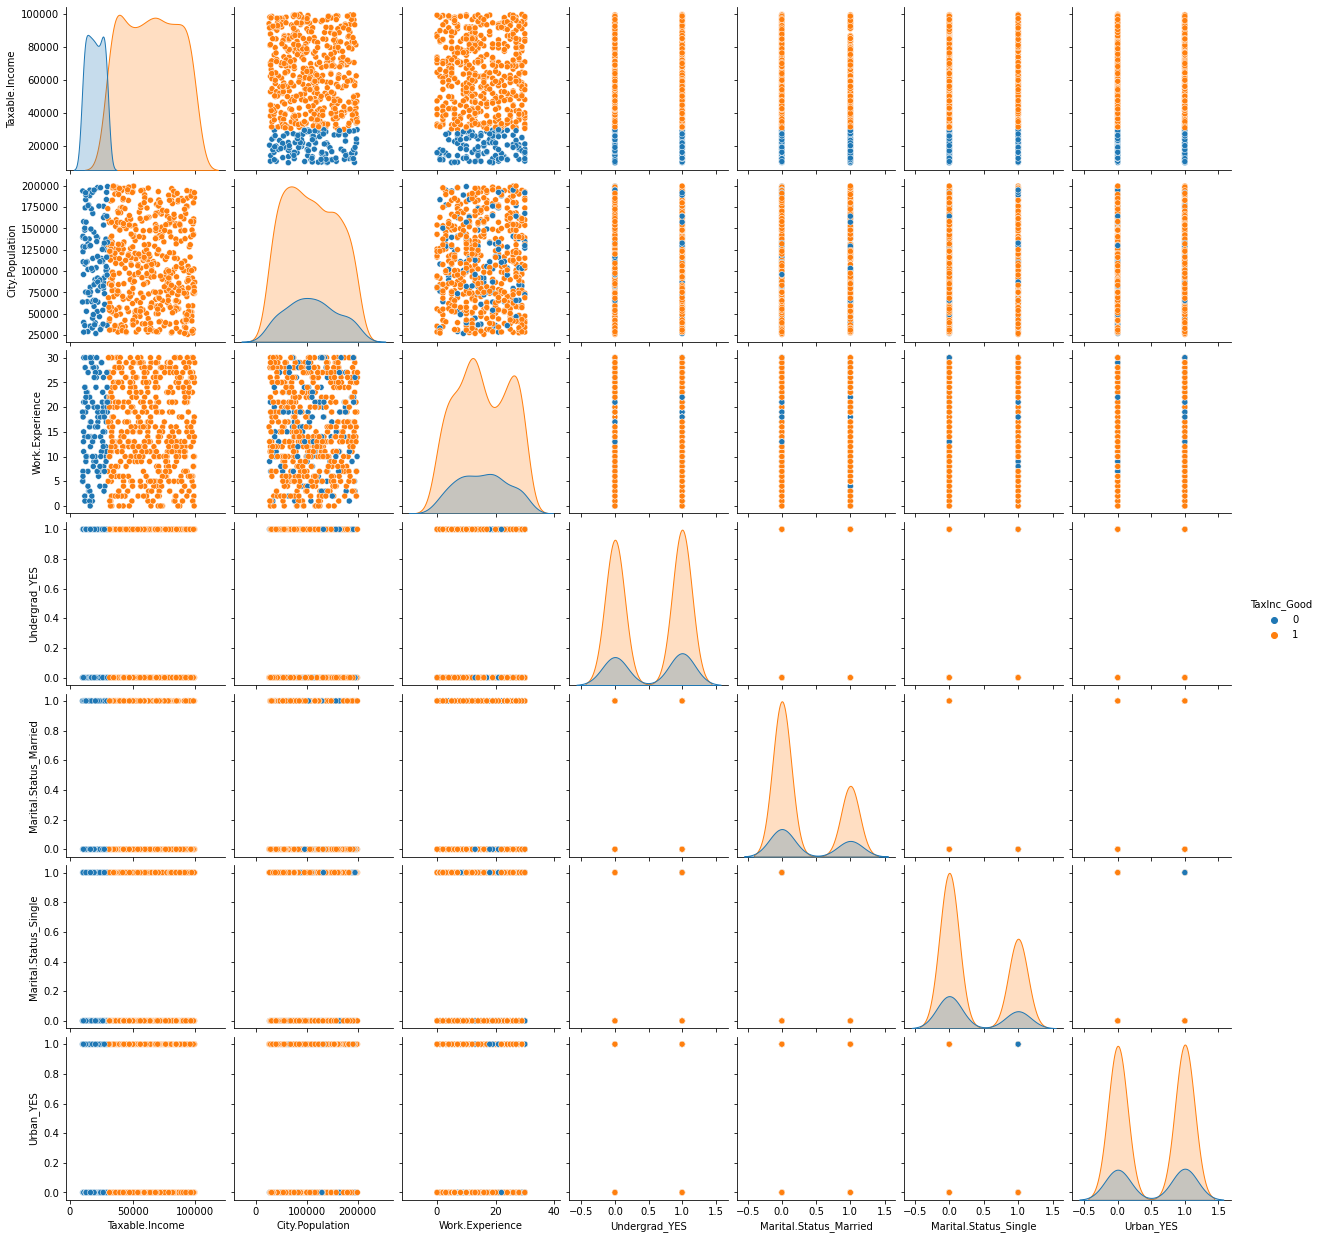

In [7]:
# let's plot pair plot to visualise
import seaborn as sns
sns.pairplot(data=data, hue = 'TaxInc_Good')

In [8]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [10]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
Y = df_norm['TaxInc_Good']

# Train Test Split

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


In [12]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[data["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[data["Taxable.Income"]<=30000,"income"]="Risky"

In [13]:
##Droping the Taxable income variable
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [14]:
data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [15]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [16]:
##Splitting the data into featuers and labels
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [17]:
## Collecting the column names
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


# Building Decision Tree Classifier using Entropy Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
from sklearn import tree

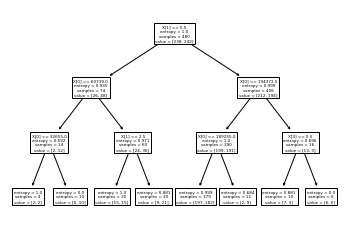

In [21]:
#PLot the decision tree
tree.plot_tree(model);

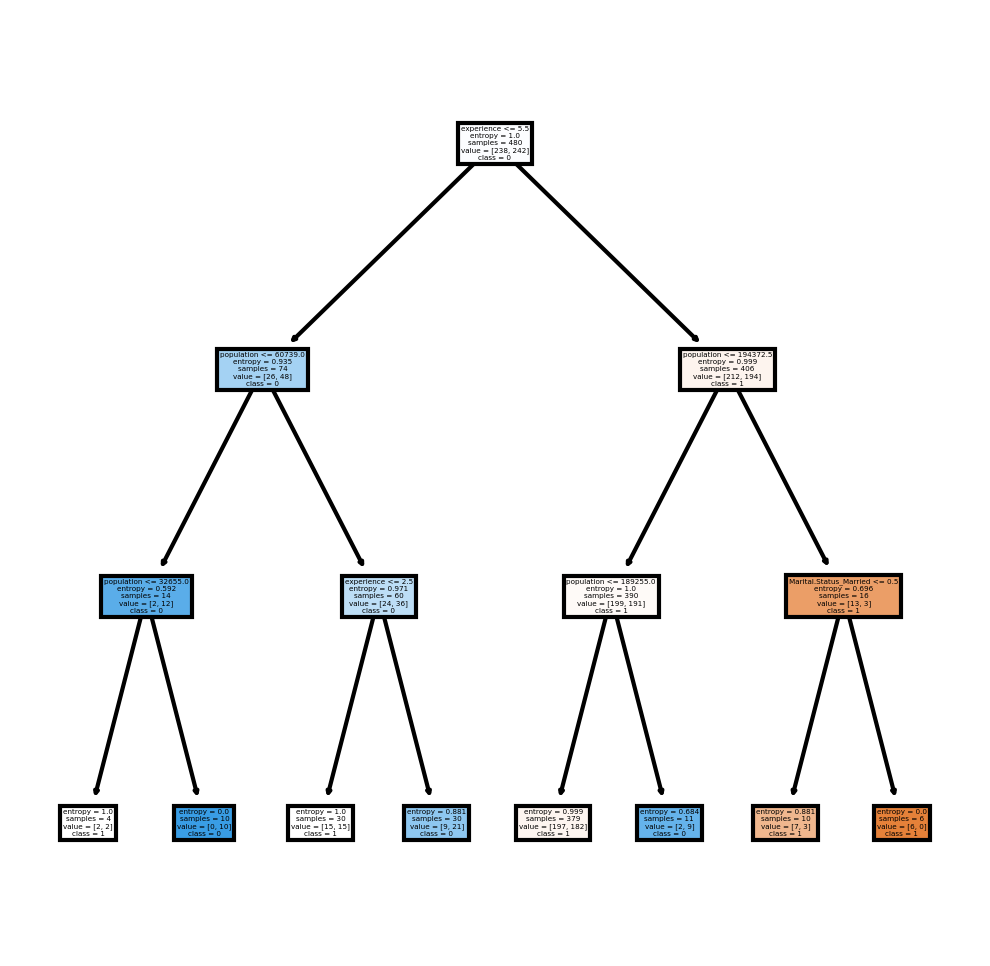

In [22]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [23]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    98
1    22
dtype: int64

In [24]:
pd.crosstab(Y_test,preds) 

col_0,0,1
Urban_YES,,
0,50,10
1,48,12


In [25]:
# Accuracy 
np.mean(preds==Y_test)

0.5166666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.5166666666666667

# Bagging

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
X = data.iloc[:,0:5]
Y = data.iloc[:,5]
seed = 7

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 200
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.5200000000000001


# Random Forest Classifier

In [31]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier


In [32]:
X = data.iloc[:,0:5]
Y = data.iloc[:,5]
num_trees = 60
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.5016666666666667


# Boosting

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
X = data.iloc[:,0:5]
Y = data.iloc[:,5]

num_trees = 50
seed=5
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())



0.5516666666666667


# Stacking

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [36]:
X = data.iloc[:,0:5]
Y = data.iloc[:,5]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)


In [37]:
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()

estimators.append(('svm', model3))

In [38]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.5066666666666666
